In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set()

In [ ]:
from sklearn.pipeline import Pipeline

# For Scaling the data
from sklearn.preprocessing import StandardScaler

# For Classification
from sklearn.neighbors import KNeighborsClassifier

# For Splitting the data for training and Validation
from sklearn.model_selection import train_test_split

# For creating model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Principal Component Analysis for Dimensionality Reduction
from sklearn.decomposition import PCA

# For Shuffling the DataFrame
from sklearn.utils import shuffle

In [ ]:
loan_train = pd.read_csv("/content/train.csv")

In [ ]:
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
loan_train.shape

(614, 13)

## checking if data is balanced or unbalanced 


In [ ]:
loan_train['Loan_Status'].isnull().sum()

0

In [ ]:
loan_train['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
loan_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

### Plotting unique values


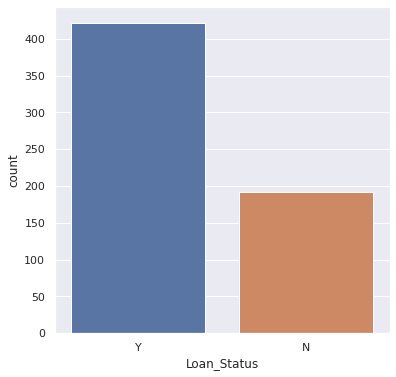

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Loan_Status',data=loan_train)



we ca see that data is imbalanced as- 
# 1)loan_status yes is much higher that no

We have to balance the data :
we can increase the applicannt having status as no 
remove the applicants having status as yes

removing the records having any columns as null but loan status as yes

In [ ]:
loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
null1=['Gender','Dependents','Married','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']

In [ ]:
for i in null1 :
  drop1=loan_train[loan_train[i].isnull()]
  drop1=drop1[drop1['Loan_Status']=='Y']
  loan_train.drop(index=drop1.index,inplace=True)
  loan_train.reset_index(drop=True,inplace=True)
#print(drop1)

In [ ]:
drop1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
14,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
37,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
72,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
78,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
103,LP001405,Male,Yes,1,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,Y
110,LP001443,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,Y
113,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y
139,LP001541,Male,Yes,1,Graduate,No,6000,0.0,160.0,360.0,NaN,Rural,Y
166,LP001643,Male,Yes,0,Graduate,No,2383,2138.0,58.0,360.0,NaN,Rural,Y
175,LP001671,Female,Yes,0,Graduate,No,3416,2816.0,113.0,360.0,NaN,Semiurban,Y


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


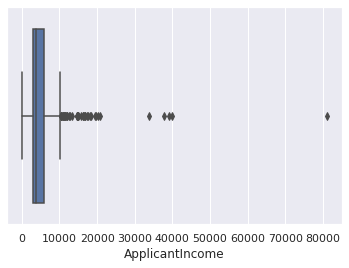

In [ ]:
sns.boxplot(loan_train['ApplicantIncome'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


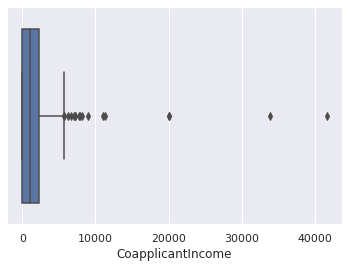

In [ ]:
sns.boxplot(loan_train['CoapplicantIncome'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


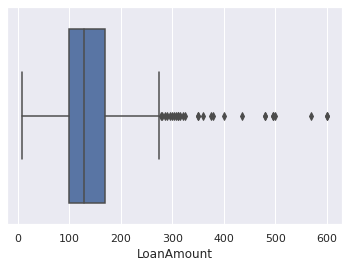

In [ ]:
sns.boxplot(loan_train['LoanAmount'])

## Dropping outliers 

In [ ]:
outliers={'LoanAmount':400,'ApplicantIncome':35000,'CoapplicantIncome':15000}
for i in outliers:
  drop2=loan_train[loan_train[i]>outliers[i]]
  drop2=drop2[drop2['Loan_Status']=='Y']
  loan_train.drop(index=drop2.index,inplace=True)
  loan_train.reset_index(drop=True,inplace=True)




In [ ]:
drop2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
335,LP002297,Male,No,0,Graduate,No,2500,20000.0,103.0,360.0,1.0,Semiurban,Y


## Feature_Selection

In [ ]:
loan_train_corr= loan_train.corr()

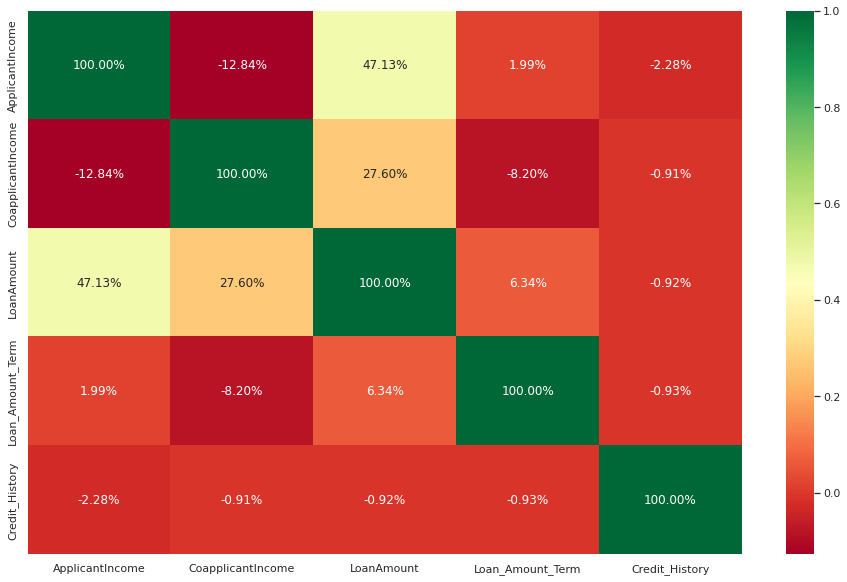

In [ ]:
plt.figure(figsize=(16,10))

sns.heatmap(loan_train_corr,cmap='RdYlGn', annot = True, fmt = '.2%')

In [ ]:
loan_train['Loan_Status'].value_counts()

Y    324
N    192
Name: Loan_Status, dtype: int64

In [ ]:
corr1 = loan_train.corrwith(loan_train['Loan_Status'].apply(lambda x : {'Y' : 1, 'N' : 0}[x]))
corr1

ApplicantIncome     -0.065145
CoapplicantIncome   -0.071872
LoanAmount          -0.109947
Loan_Amount_Term    -0.016807
Credit_History       0.553954
dtype: float64

In [ ]:
loan_train


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
512,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
513,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
514,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Feature Engineering

In [ ]:
loan_train['Gender'].describe()

count      511
unique       2
top       Male
freq       422
Name: Gender, dtype: object

In [ ]:
loan_train['Gender'].isnull().sum()

5

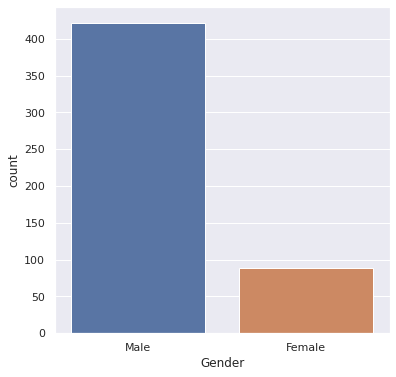

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Gender',data=loan_train)

In [ ]:
gender_drop=loan_train[loan_train['Gender'].isnull()]
gender_drop

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
266,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
397,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
423,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N
483,LP002872,NaN,Yes,0,Graduate,No,3087,2210.0,136.0,360.0,0.0,Semiurban,N


In [ ]:
gender_drop=gender_drop[gender_drop['Loan_Status']=='Y']
loan_train.drop(index=gender_drop.index,inplace=True)
loan_train.reset_index(drop=True,inplace=True)

let us plot gender with other columns

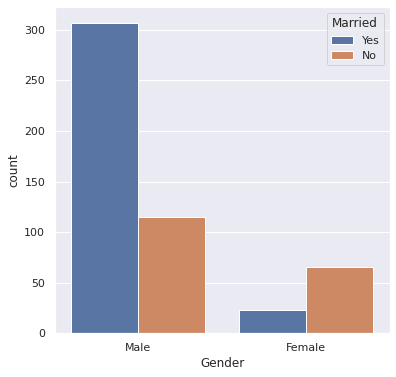

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Gender',data=loan_train,hue='Married')
plt.show()

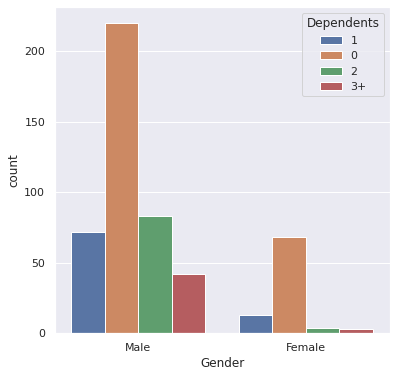

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Gender',data=loan_train,hue='Dependents')
plt.show()

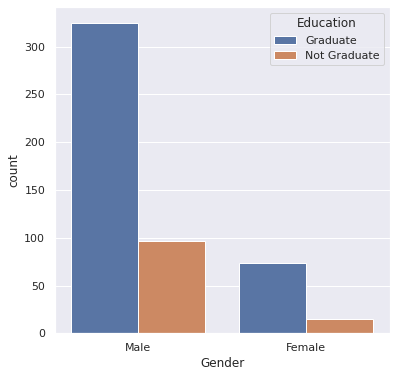

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Gender',data=loan_train,hue='Education')
plt.show()

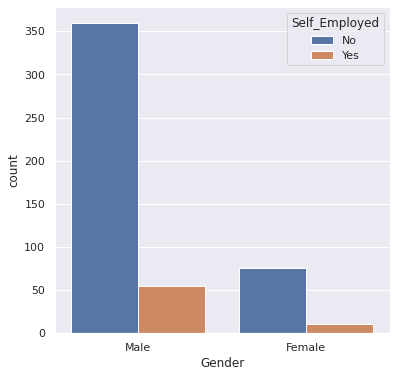

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Gender',data=loan_train,hue='Self_Employed')
plt.show()

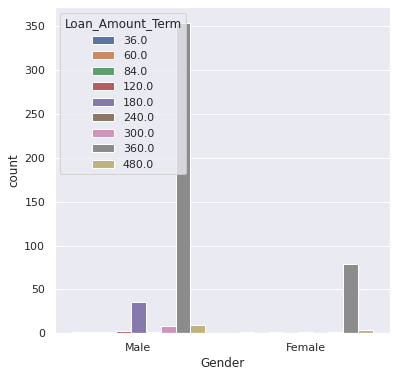

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Gender',data=loan_train,hue='Loan_Amount_Term')
plt.show()

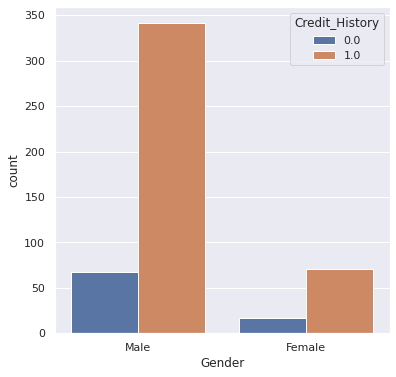

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Gender',data=loan_train,hue='Credit_History')
plt.show()

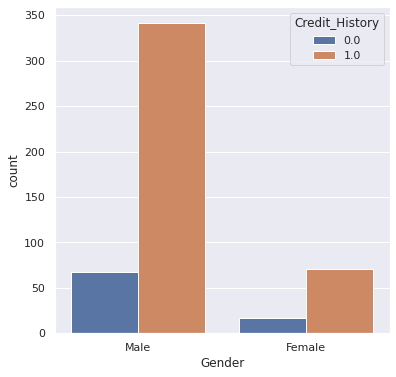

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Gender',data=loan_train,hue='Credit_History')
plt.show()

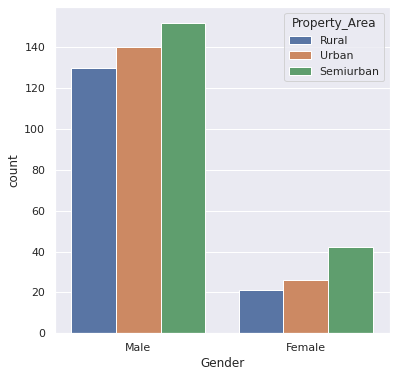

In [ ]:

plt.figure(figsize=(6,6))
sns.countplot(x='Gender',data=loan_train,hue='Property_Area')
plt.show()

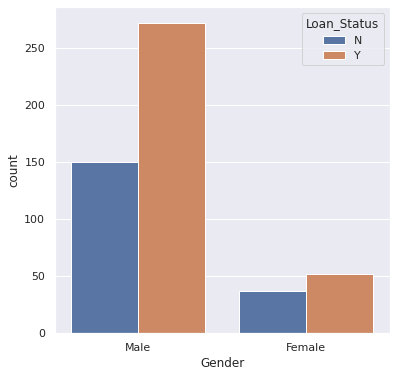

In [ ]:


plt.figure(figsize=(6,6))
sns.countplot(x='Gender',data=loan_train,hue='Loan_Status')
plt.show()

Predicting the gender 

In [ ]:
GENDER_PREDICTOR_COLUMNS = ['Dependents', 'ApplicantIncome', 'LoanAmount', 'Property_Area', 'Gender']
#rows not having null values on gender column

gender_null=loan_train[~loan_train['Gender'].isnull()][GENDER_PREDICTOR_COLUMNS]
gender_null.shape[0]

511

# Dropping samples having null values in predictor columns

In [ ]:
gender_null=gender_null.dropna(how='any')

In [ ]:
gender_null.shape[0]

494

# Conveting categorical values on Dependents column to numerical values

In [ ]:
gender_null['Dependents']=gender_null['Dependents'].apply(lambda x:{'0':0,'1':1,'2':2,'3+':3}[x])

# Conveting categorical values on Property_Area column to numerical values

In [ ]:
gender_null['Property_Area']=gender_null['Property_Area'].apply(lambda x : {'Urban': 2, 'Semiurban':1.5, 'Rural':1}[x])

# Building Gender Predictor using Pipeline and KNeigborsClassifiers

In [ ]:
#from sklearn.preprocessing import 
Gender_pred=Pipeline(steps=[('scaler',StandardScaler()),('gen_predictor', KNeighborsClassifier(n_neighbors = 1))])
Gender_pred.fit(gender_null.iloc[:,:-1].values,gender_null.iloc[:,-1].values)

Pipeline(steps=[('scaler', StandardScaler()),
                ('gen_predictor', KNeighborsClassifier(n_neighbors=1))])

## filling null values on Gender column

In [ ]:
def gender_null_value_filler(df, Gender_predictor):
    for row in range(df.shape[0]):
        if df.loc[row, 'Gender'] is np.nan:
            X = loan_train.loc[row, GENDER_PREDICTOR_COLUMNS[:-1]].values.reshape(1, -1)
            X[0][0] ={'0': 0, '1':1, '2':2, '3+':3}[X[0][0]] 
            X[0][3] = {'Urban': 2, 'Semiurban':1.5, 'Rural':1}[X[0][3]]
            df.loc[row, 'Gender'] = Gender_predictor.predict(X)
    return df

In [ ]:
def gender_value_filler(df,Gender_pred):
  for row in range(df.shape[0]):
    if df.loc[row,'Gender'] is np.nan:
      X = loan_train.loc[row,GENDER_PREDICTOR_COLUMNS[:-1]].values.reshape(1,-1)
      X[0][0] = {'0': 0, '1':1, '2':2, '3+':3}[X[0][0]] 
      X[0][3] = {'Urban': 2, 'Semiurban':1.5, 'Rural':1}[X[0][3]]
      df.loc[row, 'Gender'] = Gender_pred.predict(X)
    return df

## Filling null values on Gender columns optimally

In [ ]:
loan_train = gender_null_value_filler(loan_train,Gender_pred)

In [ ]:
loan_train['Gender']=loan_train.Gender.apply(lambda x : {'Male': 1, 'Female' : 0}[x])

In [ ]:
loan_train['Gender']

0      1
1      1
2      1
3      1
4      1
      ..
511    0
512    1
513    1
514    1
515    0
Name: Gender, Length: 516, dtype: int64

### Checking with Married Columns


In [ ]:
loan_train['Married'].describe()

count     516
unique      2
top       Yes
freq      334
Name: Married, dtype: object

In [ ]:
loan_train['Married'].isnull().sum()

0

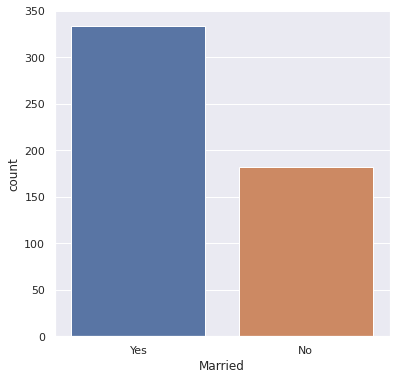

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Married',data=loan_train)

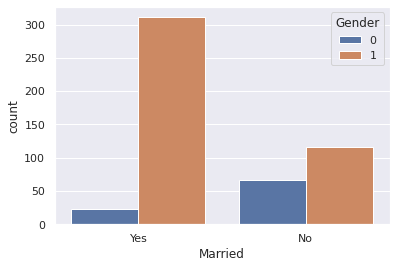

In [ ]:
sns.countplot(x = 'Married', data = loan_train, hue = 'Gender')

plt.show()


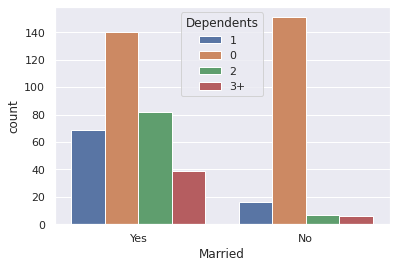

In [ ]:
sns.countplot(x = 'Married', data = loan_train, hue = 'Dependents')

plt.show()

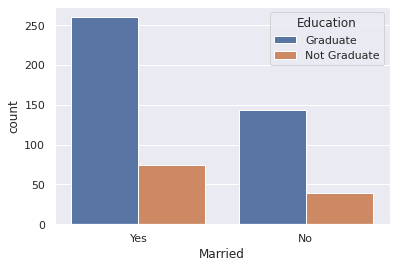

In [ ]:
sns.countplot(x = 'Married', data = loan_train, hue = 'Education')

plt.show()

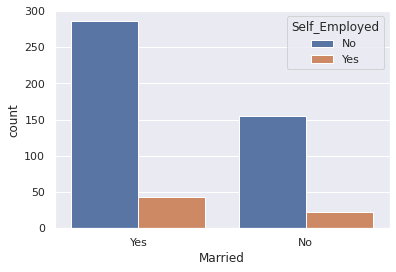

In [ ]:
sns.countplot(x = 'Married', data = loan_train, hue = 'Self_Employed')

plt.show()

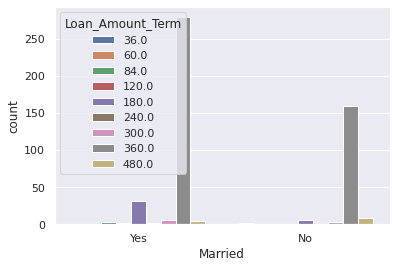

In [ ]:
sns.countplot(x = 'Married', data = loan_train, hue = 'Loan_Amount_Term')

plt.show()

In [ ]:
null_gender=loan_train[loan_train['Married'].isnull()]
null_gender

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


## Feature correlation with loan status

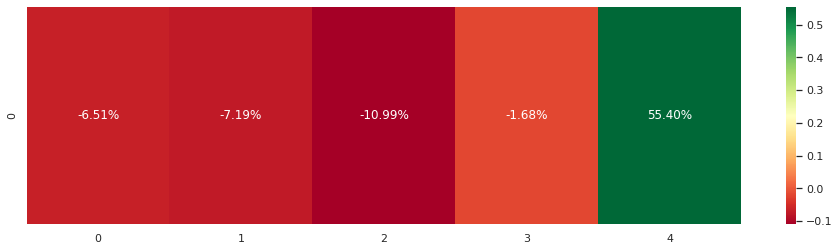

In [ ]:
plt.figure(figsize = (16, 4))
sns.heatmap([corr1], cmap = 'RdYlGn', annot = True, fmt = '.2%')

Credit history has the highest co relation with loan_status

Now lets find the relation between  Gender, Applicant Income and Loan Status

<Figure size 864x432 with 0 Axes>

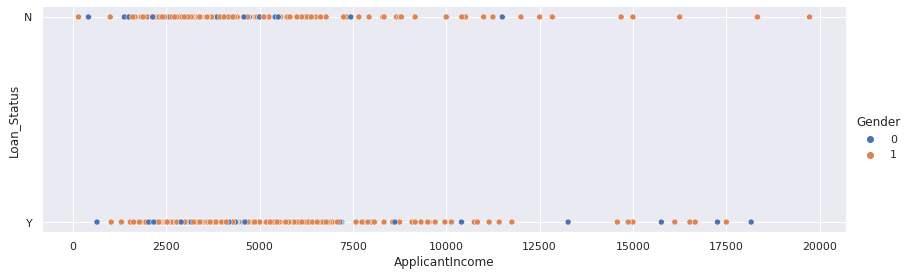

In [ ]:
plt.figure(figsize=(12,6))
sns.relplot(x="ApplicantIncome",y="Loan_Status",data=loan_train[loan_train['ApplicantIncome']<=20000],hue = 'Gender', aspect = 3, height = 4)

In [ ]:
loan_train['Dependents'].isnull().sum()

6

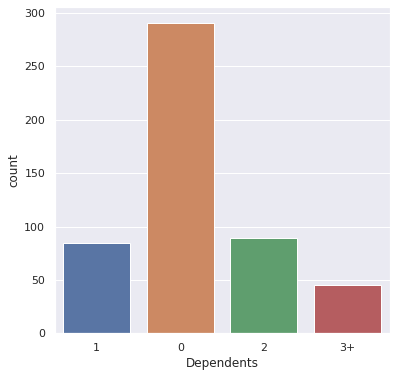

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x = 'Dependents', data = loan_train)

Function for filling null values on dependents columns

In [ ]:
def dependents_null_value_filler(df):
    for row in range(df.shape[0]):
        if df.loc[row, 'Dependents'] is np.nan:
            df.loc[row, 'Dependents'] = str(df.loc[row, 'Married'])
    return df

In [ ]:
loan_train = dependents_null_value_filler(loan_train)

In [ ]:
loan_train['Dependents'].isnull().sum()

0

In [ ]:
loan_train['Dependents'].unique()

array(['1', '0', '2', '3+', 'Yes', 'No'], dtype=object)

In [ ]:
loan_train['Dependents'] = loan_train['Dependents'].apply(lambda x : {'0' : 0, '1' : 1, '2' : 2, '3+' : 3,'Yes':1,'No':0}[x])

loan_status and dependent

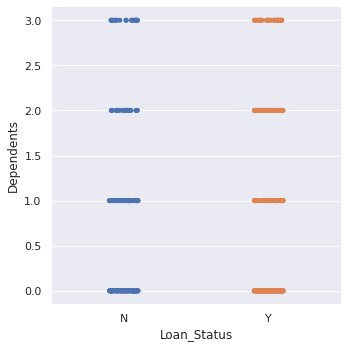

In [ ]:
sns.catplot(x="Loan_Status",y="Dependents",data=loan_train)

## 5 Education

In [ ]:
loan_train['Education'].describe()

count          516
unique           2
top       Graduate
freq           403
Name: Education, dtype: object

In [ ]:
loan_train['Education'].isnull().sum()

0

### 6. Self_Employed

In [ ]:
loan_train['Self_Employed'].describe()

count     507
unique      2
top        No
freq      441
Name: Self_Employed, dtype: object

In [ ]:
loan_train['Self_Employed'].isnull().sum()

9

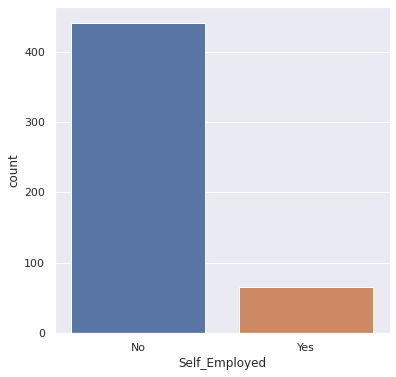

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x = 'Self_Employed', data = loan_train)

In [ ]:
corr_with_loan_status = loan_train.corrwith(loan_train['Loan_Status'].apply(lambda x : {'Y' : 1, 'N' : 0}[x]))
corr_with_loan_status

Gender               0.041216
Dependents           0.021940
ApplicantIncome     -0.065145
CoapplicantIncome   -0.071872
LoanAmount          -0.109947
Loan_Amount_Term    -0.016807
Credit_History       0.553954
dtype: float64

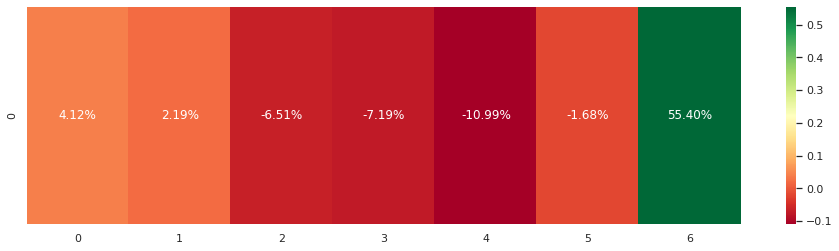

In [ ]:
plt.figure(figsize = (16, 4))
sns.heatmap([corr_with_loan_status], cmap = 'RdYlGn', annot = True, fmt = '.2%')
plt.savefig('/correlation_of_features_with_loan_status.png')

<Figure size 864x432 with 0 Axes>

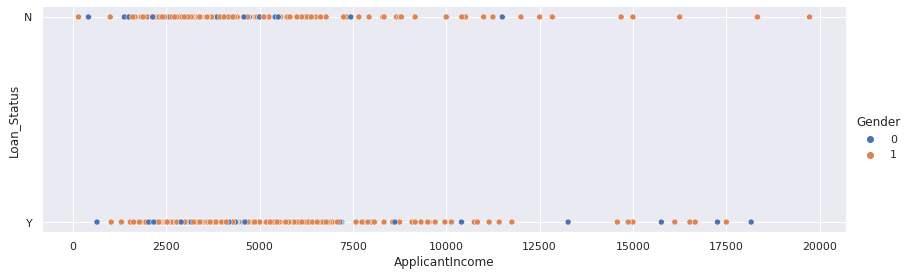

In [ ]:
plt.figure(figsize = (12, 6))
sns.relplot(x = 'ApplicantIncome', y = 'Loan_Status', 
           data = loan_train[loan_train['ApplicantIncome'] <= 20000],
           hue = 'Gender', aspect = 3, height = 4)

In [ ]:
sb.catplot(x = 'Loan_Status', y = 'Dependents', data = loan_train)

NameError: ignored

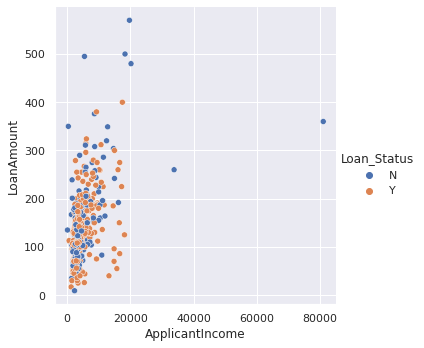

In [ ]:
sns.relplot(x = 'ApplicantIncome', y = 'LoanAmount', data = loan_train, hue = 'Loan_Status')

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
y = loan_train['Loan_Status'].apply(lambda x : {'Y' : 1, 'N' : 0}[x]).values
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(loan_train.iloc[:, :-1].values, y)


print("Percentage Importance of each features with respect to Loan_Status : ")
pd.Series(etc.feature_importances_*100, index = loan_train.columns[:-1])

ValueError: ignored

### Feature Selection

In [102]:
corr_with_loan_status = loan_train.corrwith(loan_train['Loan_Status'].apply(lambda x : {'Y' : 1, 'N' : 0}[x]))
corr_with_loan_status

Gender               0.041216
Dependents           0.021940
ApplicantIncome     -0.065145
CoapplicantIncome   -0.071872
LoanAmount          -0.109947
Loan_Amount_Term    -0.016807
Credit_History       0.553954
dtype: float64

In [103]:
X = loan_train.drop(['Loan_Status'],axis=1)
Y =loan_train['Loan_Status']
X.shape,Y.shape

((516, 12), (516,))

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.4,
                                                    random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((309, 12), (207, 12), (309,), (207,))

In [107]:
# TODO : To know the feature Importances
y = loan_train['Loan_Status'].apply(lambda x : {'Y' : 1, 'N' : 0}[x]).values
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(loan_train.iloc[:, :-1].values, y)

print("Percentage Importance of each features with respect to Loan_Status : ")
pd.Series(etc.feature_importances_*100, index = loan_train.columns[:-1])

ValueError: ignored

In [ ]:
etc.fit(loan_train.iloc[:, :-1].values, y)

ExtraTreesClassifier()

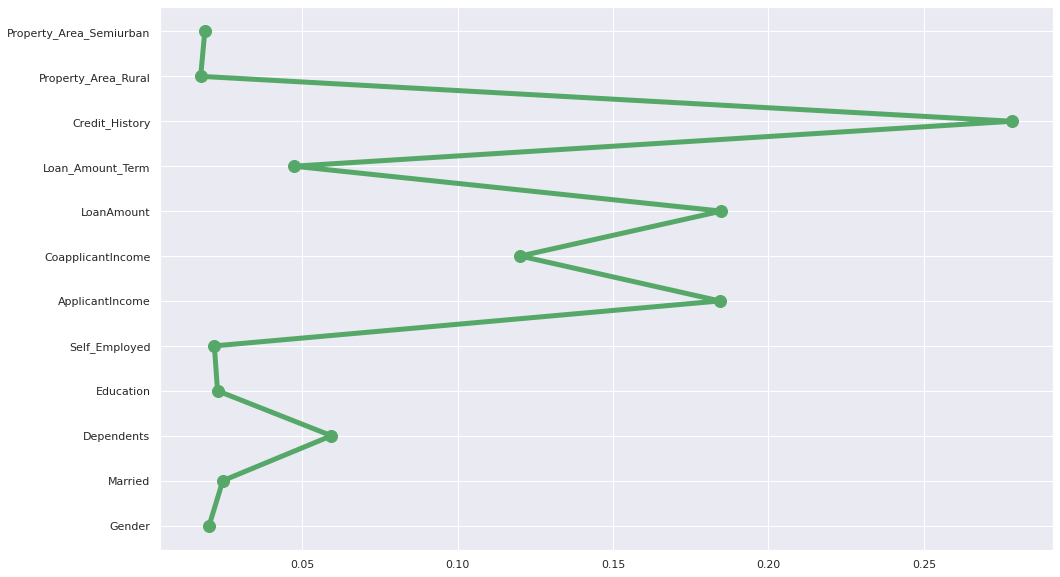

In [ ]:
plt.figure(figsize=(16, 10))
plt.plot(etc.feature_importances_, loan_train.columns[:-1], 'g-o', linewidth=5, markersize=12)
#plt.savefig("../images/feature_importances.png")

###### From the above plot, Credit_History (28 %) has the more importance, and then Loan Amount and Applicant Income and then Co-applicant Income

#### Relation Between Credit_History, Loan_Amount and Applicant_Income with Loan_Status

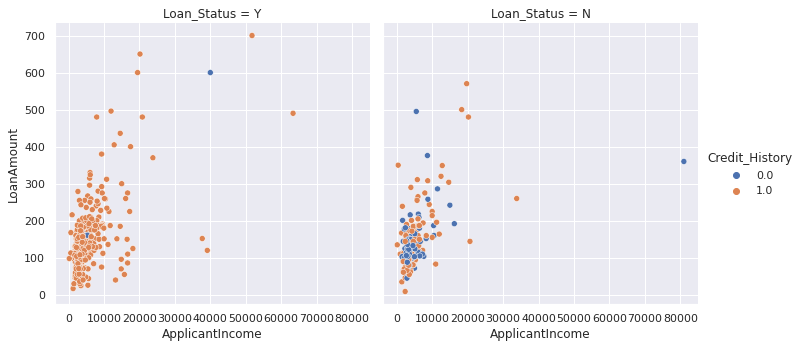

In [ ]:
# TODO : Relation Between Credit_History, Loan_Amount and Applicant_Income with Loan_Status
sb.relplot(x = 'ApplicantIncome', y = 'LoanAmount', data = loan_train,
           hue = 'Credit_History', col = 'Loan_Status')

From the above plot,

we can see credit history is an important feature

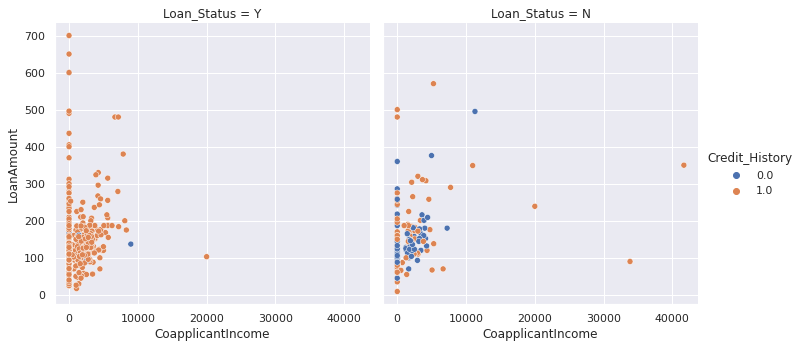

In [ ]:
# TODO : Relation Between Credit_History, Loan_Amount and Coapplicant_Income with Loan_Status
sb.relplot(x = 'CoapplicantIncome', y = 'LoanAmount', data = loan_train,
           hue = 'Credit_History', col = 'Loan_Status')

#### Most of the Co-applicants are not having income

<br><br><br>

## Feature Selection

In [ ]:

prediction_features = pd.Series(etc.feature_importances_*100, index = loan_train.columns[:-1]).sort_values(ascending = False)

## Extracting Features name

In [ ]:

prediction_features = prediction_features.index

In [ ]:
prediction_features = prediction_features[:5]
prediction_features

Index(['Credit_History', 'LoanAmount', 'ApplicantIncome', 'CoapplicantIncome',
       'Dependents'],
      dtype='object')

In [ ]:
feature_columns = loan_train[prediction_features]
prediction_column = loan_train['Loan_Status']

In [ ]:
X = feature_columns.values
y = prediction_column.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((491, 5), (123, 5), (491,), (123,))

<br><br><br><br><br><br>

# Logistic Regresion with Model Performance

<br><br>

## Simple Logistic Regression

In [106]:
logictic_model = LogisticRegression(max_iter = 1000)
logictic_model.fit(X_train, y_train)

print("Training Accuracy : {}%".format(logictic_model.score(X_train, y_train) * 100))
print("Testing Accuracy  : {}%".format(logictic_model.score(X_test, y_test) * 100))

NameError: ignored

#### Thus our Logistic Regression model is having 80% Training Accuracy and 86% Testing Accuracy

In [ ]:
train_scores = []
test_scores = []
logistic_model_dict = {}
random_states = list(range(50))
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = random_state)
    
    logictic_model = LogisticRegression(max_iter = 200)
    logictic_model.fit(X_train, y_train)
    
    train_score = logictic_model.score(X_train, y_train) * 100
    test_score = logictic_model.score(X_test, y_test) * 100
    
    logistic_model_dict[random_state] = {'Train Score' : train_score, 'Test Score' : test_score}
    train_scores.append(train_score)
    test_scores.append(test_score)


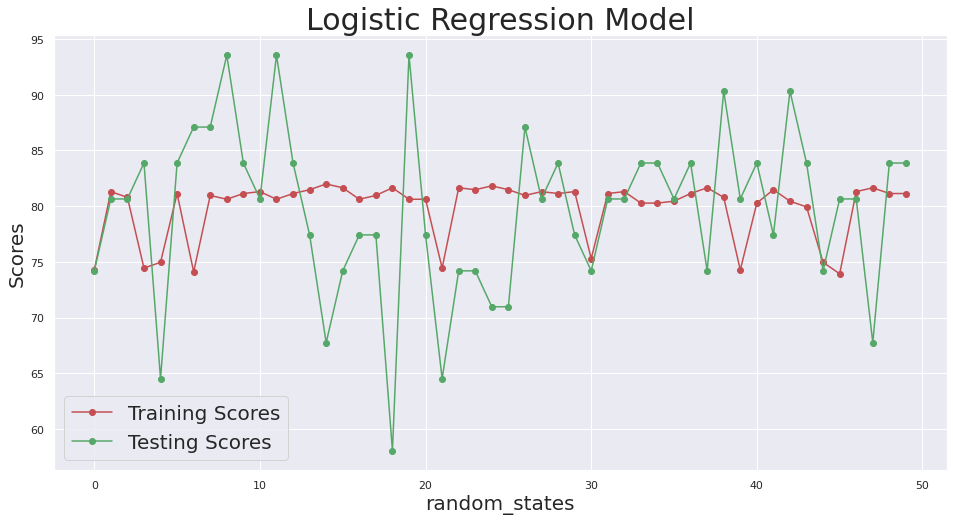

In [ ]:
plt.figure(figsize = (16, 8))
plt.plot(random_states, train_scores, 'ro-')
plt.plot(random_states, test_scores, 'go-')
plt.xlabel('random_states', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Logistic Regression Model', fontsize = 30)
# plt.ylim(0, 100)
plt.legend(labels = ['Training Scores', 'Testing Scores'], fontsize = 20)
#plt.savefig('../images/logistic_model_performance.png')
plt.show()

In [ ]:
train_scores = []
test_scores = []
logistic_model_dict = {}
random_states = list(range(50))
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = random_state)
    
    logictic_model = LogisticRegression(max_iter = 200)
    logictic_model.fit(X_train, y_train)
    
    train_score = logictic_model.score(X_train, y_train) * 100
    test_score = logictic_model.score(X_test, y_test) * 100
    
    logistic_model_dict[random_state] = {'Train Score' : train_score, 'Test Score' : test_score}
    train_scores.append(train_score)
    test_scores.append(test_score)

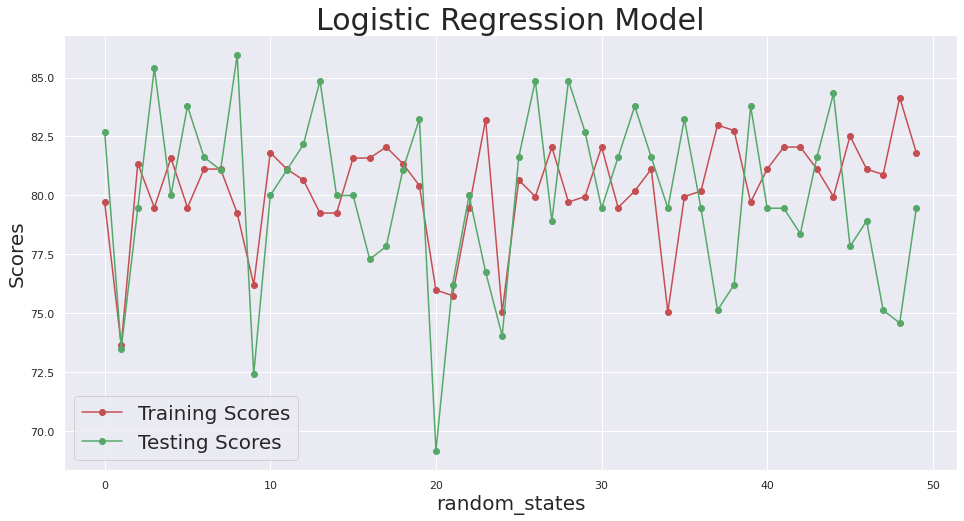

In [ ]:
plt.figure(figsize = (16, 8))
plt.plot(random_states, train_scores, 'ro-')
plt.plot(random_states, test_scores, 'go-')
plt.xlabel('random_states', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Logistic Regression Model', fontsize = 30)
# plt.ylim(0, 100)
plt.legend(labels = ['Training Scores', 'Testing Scores'], fontsize = 20)
#plt.savefig('../images/logistic_model_performance.png')
plt.show()

In [ ]:
# Let's print the corresponding Training and Testing Scores
for scores in zip(train_scores, test_scores, abs(np.array(train_scores) - np.array(test_scores))):
    print(scores)

(79.72027972027972, 82.70270270270271, 2.982422982422989)
(73.65967365967366, 73.51351351351352, 0.14616014616014184)
(81.35198135198135, 79.45945945945945, 1.8925218925218985)
(79.48717948717949, 85.4054054054054, 5.9182259182259145)
(81.58508158508158, 80.0, 1.585081585081582)
(79.48717948717949, 83.78378378378379, 4.2966042966043005)
(81.11888111888112, 81.62162162162161, 0.5027405027404939)
(81.11888111888112, 81.08108108108108, 0.03780003780003938)
(79.25407925407926, 85.94594594594595, 6.691866691866693)
(76.22377622377621, 72.43243243243244, 3.7913437913437775)
(81.81818181818183, 80.0, 1.8181818181818272)
(81.11888111888112, 81.08108108108108, 0.03780003780003938)
(80.65268065268066, 82.16216216216216, 1.5094815094815033)
(79.25407925407926, 84.86486486486487, 5.610785610785612)
(79.25407925407926, 80.0, 0.745920745920742)
(81.58508158508158, 80.0, 1.585081585081582)
(81.58508158508158, 77.29729729729729, 4.287784287784291)
(82.05128205128204, 77.83783783783784, 4.2134442134442

#### See how training accuracy and testing accuracy changing for different training Samples

<br><br><br><br>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

<br><br><br><br>

## Logistic Regression with Standard Scaling and PCA

    # Converting Train Data to Same Scale
     standard_scaler = StandardScaler()
     # Scaling training samples
     scaled_X_train = standard_scaler.fit_transform(X_train)
     # Scaling testing samples
     scaled_X_test = standard_scaler.transform(X_test)
    
    # PCA Implementation

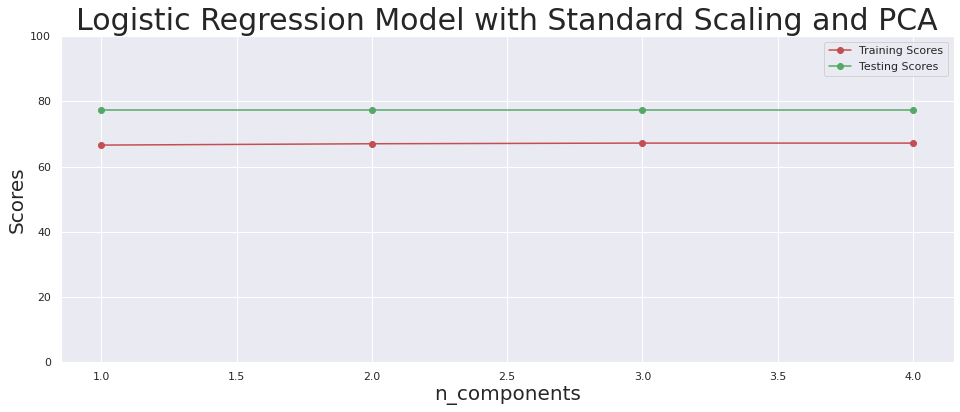

In [ ]:
training_scores = []
testing_scores = []
n_components = list(range(1, 5))
for n_component in n_components:

    pca = PCA(n_components = n_component)
    pca_X_train = pca.fit_transform(X_train)
    pca_X_test = pca.transform(X_test)
    
    logictic_model = LogisticRegression(max_iter = 200)
    logictic_model.fit(pca_X_train, y_train)
    training_scores.append(logictic_model.score(pca_X_train, y_train) * 100)
    testing_scores.append(logictic_model.score(pca_X_test, y_test) * 100)

plt.figure(figsize = (16, 6))
plt.plot(n_components, training_scores, 'ro-')
plt.plot(n_components, testing_scores, 'go-')
plt.xlabel('n_components', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Logistic Regression Model with Standard Scaling and PCA', fontsize = 30)
plt.ylim(0, 100)
plt.legend(labels = ['Training Scores', 'Testing Scores'])
plt.show()

### Decision Tree Classifier with Standard Scaling

In [108]:
training_scores = []
testing_scores = []
max_depths = list(range(1, 30))
for max_depth in max_depths:
    # Converting Train Data to Same Scale
    standard_scaler = StandardScaler()
    
    scaled_X_train = standard_scaler.fit_transform(X_train)
    scaled_X_test = standard_scaler.transform(X_test)
    
    decision_tree_model = DecisionTreeClassifier(max_depth = max_depth)
    decision_tree_model.fit(scaled_X_train, y_train)
    training_scores.append(decision_tree_model.score(scaled_X_train, y_train) * 100)
    testing_scores.append(decision_tree_model.score(scaled_X_test, y_test) * 100)

plt.figure(figsize = (16, 6))
plt.plot(max_depths, training_scores, 'ro-')
plt.plot(max_depths, testing_scores, 'go-')
plt.xlabel('Max Depths', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Decision Tree Classifier Model with Standard Scaling', fontsize = 30)
# plt.ylim(50, 105)
plt.legend(labels = ['Training Scores', 'Testing Scores'])
plt.show()

ValueError: ignored

#### For max_depth = 8, we get a Training Accuracy of 85.74% and a Testing Accuracy of 85.36%

<br><br><br><br>

## Decision Tree Classifier with Standard Scaling and PCA

In [ ]:
for max_depth in range(3, 10):
    training_scores = []
    testing_scores = []
    n_components = list(range(1, 6))
    for n_component in n_components:
        # Converting Train Data to Same Scale
        standard_scaler = StandardScaler()
        # Scaling training samples
        scaled_X_train = standard_scaler.fit_transform(X_train)
        # Scaling testing samples
        scaled_X_test = standard_scaler.transform(X_test)

        # PCA Implementation
        pca = PCA(n_components = n_component)
        pca_X_train = pca.fit_transform(scaled_X_train)
        pca_X_test = pca.transform(scaled_X_test)

        decision_tree_model = DecisionTreeClassifier(max_depth = max_depth)
        decision_tree_model.fit(pca_X_train, y_train)
        training_scores.append(decision_tree_model.score(pca_X_train, y_train) * 100)
        testing_scores.append(decision_tree_model.score(pca_X_test, y_test) * 100)

    plt.figure(figsize = (16, 6))
    plt.plot(n_components, training_scores, 'ro-')
    plt.plot(n_components, testing_scores, 'go-')
    plt.xlabel('n_components', fontsize = 20)
    plt.ylabel('Scores', fontsize = 20)
    plt.title('Decision Tree Model with Standard Scaling and PCA', fontsize = 30)
    # plt.ylim(60, 90)
    plt.legend(labels = ['Training Scores', 'Testing Scores'])
    plt.show()
    
    # Let's print the corresponding Training and Testing Scores
    print("Max_Depth : ", max_depth)
    for scores in zip(training_scores, testing_scores):
        print(scores)

#### With PCA, Statndard Scaling and Decision Tree Classifier, we can get a Training accuracy of 85% and a Testing accuracy of 83%

<br><br>

# A Final overview of different kind of Model Based on their performance

## Simple Logistic Regression Model without Standard Scaling and without PCA :
- Training Samples with random_state = 3
- Training Accuracy : 80.04073319755601%
- Testing Accuracy  : 86.1788617886179%

## Logistic Model with Standard Scaling and PCA :
- Can't get a good model

## Decision Tree Classifier Model without Standard Scaling and without PCA :
- random_state = 3
- Max-Depth = 8
- Training Accuracy : 85.53 %
- Testing Accuracy  : 85.36 %

## Decision Tree Classifier Model with Standard Scaling and without PCA :
- random_state = 3
- Max-Depth = 8
- Training Accuracy : 85.74 %
- Testing Accuracy  : 85.36 %

## Decision Tree Classifier Model with Standard Scaling and with PCA :
- random_state = 3
- Max-Depth = 6
- n_components (PCA) = 5
- Training Accuracy : 84.92 %
- Testing Accuracy  : 83.73 %

## Building Optimal Model with Decision Tree without Standard Scaling and without PCA

In [ ]:
feature_values = feature_columns.values
prediction_values = loan_train['Loan_Status'].values

In [ ]:
decision_tree_model = DecisionTreeClassifier(max_depth = 8)
decision_tree_model.fit(feature_values, prediction_values)

print("Score : ", decision_tree_model.score(feature_values, prediction_values))

In [ ]:
loan_test = pd.read_csv('test.csv')
loan_test.head()

In [ ]:
loan_test = loan_test.loc[:, prediction_features]
loan_test.head()

In [ ]:
# Preprocessing Test Data

# TODO : Check for null values
loan_test.isnull().sum()

##### The major feature for our model prediction is credit_history
##### so we are going to remove the samples having null values on Credit_History

In [ ]:
loan_test = loan_test.dropna(how = 'any')

In [ ]:
loan_test.isnull().sum()

In [ ]:
# TODO : Encoding Categorical data into NUmerical Data
loan_test['Dependents'] = loan_test['Dependents'].apply(lambda x : {'0' : 0, '1' : 1, '2' : 2, '3+' : 3}[x])

In [ ]:
loan_test['Loan_Status_Predicted'] = decision_tree_model.predict(loan_test.values)

In [ ]:
loan_test.head(25)

In [ ]:
loan_test.Loan_Status_Predicted.value_counts()

- Finally we finishes the project. 

- We have built a Decision Tree Classifier which performs well with selected features such as Credit_History, LoanAmount, ApplicantIncome, CoapplicantIncome and Dependents having the Training accuracy of 85.53% and Testing accuracy of 85.36%.
